<a href="https://colab.research.google.com/github/s-c-soma/AdvanceDeeplearning-CMPE-297/blob/master/Assignment_2/Assignment_2b_LinearClassifierUsing_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Classifier Using Gradient Tape and Tensorflow

This colab contains code for Linear classifier using gradiend tape and low level tensorflow. In the first section, I have loaded my Iris data and implemented model. Gradient tape is being used here for gradient compution. Next section contains the implementation code for linear classifier along with gradiend tape

# Using gradient tape for gradient computation



In [42]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.3.0
Eager execution: True


## Loading Iris data

In [64]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


## Inspect Data

In [65]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [66]:

class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

## Creating dataset and batchsize

In [67]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

## Batch features

In [68]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.4, 6. , 5.1, 7.3, 7.7, 5.6, 5.7, 6.8, 4.4, 4.6, 5. , 7.6, 5. ,
       7.9, 4.4, 5.3, 4.9, 6.8, 6.6, 4.9, 6.1, 6.3, 5.1, 6.4, 4.7, 5.7,
       5.5, 7.2, 6.4, 6.3, 5. , 6.7], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.9, 2.7, 3.8, 2.9, 3. , 2.9, 2.9, 3.2, 2.9, 3.4, 3.3, 3. , 3.5,
       3.8, 3. , 3.7, 2.5, 3. , 2.9, 3.1, 2.6, 2.7, 3.8, 2.7, 3.2, 4.4,
       3.5, 3.2, 3.2, 2.3, 3.4, 3.1], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.3, 5.1, 1.9, 6.3, 6.1, 3.6, 4.2, 5.9, 1.4, 1.4, 1.4, 6.6, 1.6,
       6.4, 1.3, 1.5, 4.5, 5.5, 4.6, 1.5, 5.6, 4.9, 1.6, 5.3, 1.6, 1.5,
       1.3, 6. , 5.3, 4.4, 1.5, 4.4], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.4, 1.6, 0.4, 1.8, 2.3, 1.3, 1.3, 2.3, 0.2, 0.3, 0.2, 2.1, 0.6,
       2. , 0.2, 0.2, 1.7, 2.1, 1.3, 0.1, 1.4, 1.8, 0.2, 1.9,

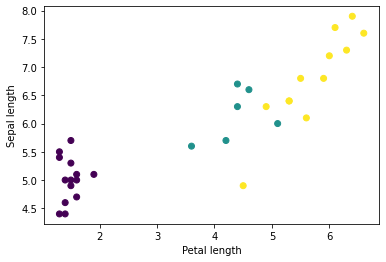

In [69]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [70]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [71]:
train_dataset = train_dataset.map(pack_features_vector)

In [72]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[7.6 3.  6.6 2.1]
 [6.6 2.9 4.6 1.3]
 [7.4 2.8 6.1 1.9]
 [7.9 3.8 6.4 2. ]
 [5.  3.4 1.6 0.4]], shape=(5, 4), dtype=float32)


## Model Definition

In [24]:

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [25]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-5.458205  ,  0.6866116 ,  0.2645525 ],
       [-4.8476386 ,  0.40428644,  0.5209347 ],
       [-1.9763058 , -0.57117337,  0.86618775],
       [-3.2510936 ,  0.07886977,  0.50127155],
       [-5.5526996 ,  0.6809468 ,  0.30530748]], dtype=float32)>

In [26]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.00129359, 0.6031946 , 0.39551184],
       [0.00246009, 0.4697126 , 0.5278273 ],
       [0.04497502, 0.18332116, 0.77170384],
       [0.01397447, 0.39040908, 0.59561646],
       [0.00116193, 0.59213215, 0.40670598]], dtype=float32)>

In [27]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [1 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 2 2 1 2 1 2 2 2 1 2 2 2 2]
    Labels: [2 2 0 1 2 1 2 0 1 2 0 0 2 0 0 2 1 2 2 1 0 2 1 2 0 0 1 2 0 1 1 1]


## Loss and gradient function

In [28]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [29]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.5102084875106812


## Gradient tape to compute gradient

In [30]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

## Optimizer

In [31]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [32]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.5102084875106812
Step: 1,         Loss: 1.4611642360687256


## Training Loop

In [33]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.452, Accuracy: 17.500%
Epoch 050: Loss: 0.463, Accuracy: 70.833%
Epoch 100: Loss: 0.335, Accuracy: 90.000%
Epoch 150: Loss: 0.228, Accuracy: 95.000%
Epoch 200: Loss: 0.163, Accuracy: 96.667%


## Loss Function Visualize

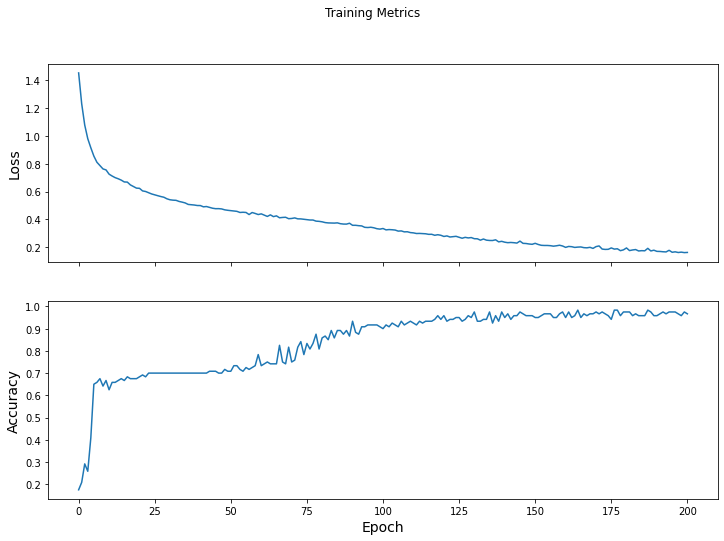

In [34]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

# Linear Classifier Code Using Tensorflow 

In [97]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [98]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare a dataset.
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)

features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),np.ones((num_samples, 1), dtype='float32')))

#features, labels


features

array([[ 0.6725972 ,  4.489116  ],
       [-0.3999189 ,  3.2077408 ],
       [ 0.44401166,  2.1251302 ],
       ...,
       [ 3.129827  ,  1.3970003 ],
       [ 3.1898434 , -0.3325943 ],
       [ 3.381634  , -0.9156826 ]], dtype=float32)

In [99]:
labels

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

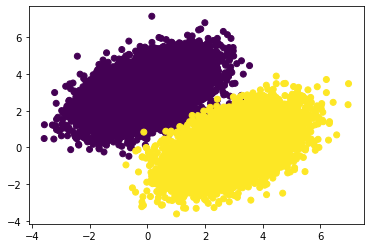

In [100]:
plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [101]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

In [102]:
print(features)
print(labels)

[[ 0.7677055   4.0839195 ]
 [ 2.5442522   0.09732337]
 [ 4.6690865  -0.5880374 ]
 ...
 [ 1.4666682   0.01499794]
 [-2.1939173   2.2286584 ]
 [ 2.741428    0.49038956]]
[[0.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [103]:
# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

In [104]:
for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0951
Epoch 1: last batch loss = 0.0599
Epoch 2: last batch loss = 0.0521
Epoch 3: last batch loss = 0.0206
Epoch 4: last batch loss = 0.0253
Epoch 5: last batch loss = 0.0304
Epoch 6: last batch loss = 0.0145
Epoch 7: last batch loss = 0.0289
Epoch 8: last batch loss = 0.0234
Epoch 9: last batch loss = 0.0296


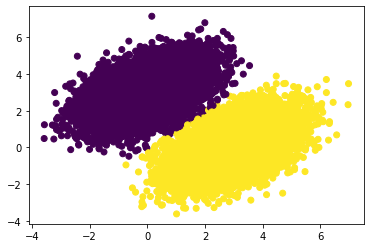

In [105]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)